<a href="https://colab.research.google.com/github/RazanHL/PRODIDY_ML_01/blob/main/Advanced_redression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv('/content/train.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


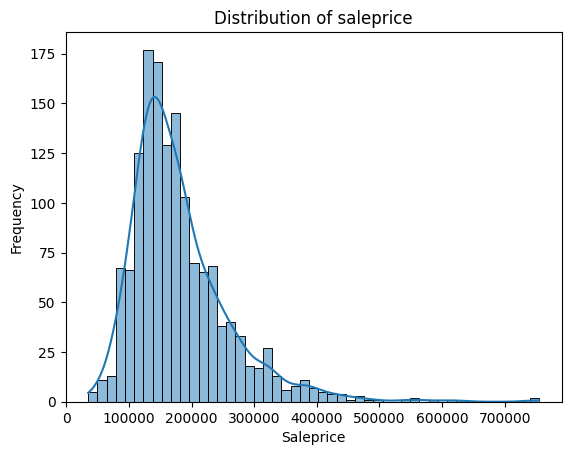

In [7]:
#Visualize distribution of target variables
plt.figure()
sns.histplot(train['SalePrice'],kde = True)
plt.title("Distribution of saleprice")
plt.xlabel('Saleprice')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='None', ylabel='SalePrice'>

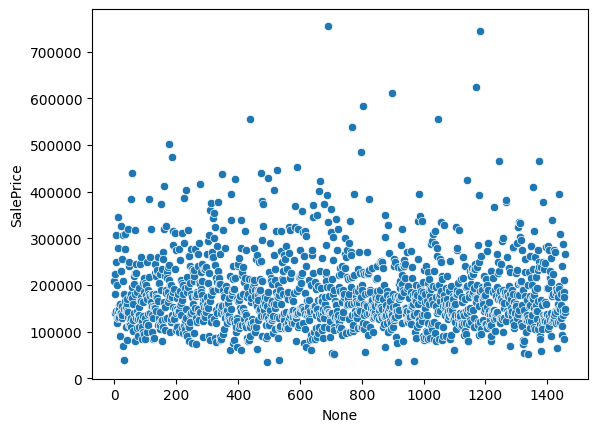

In [8]:
sns.scatterplot(data=train, x=train.index, y='SalePrice')

<Axes: xlabel='SalePrice'>

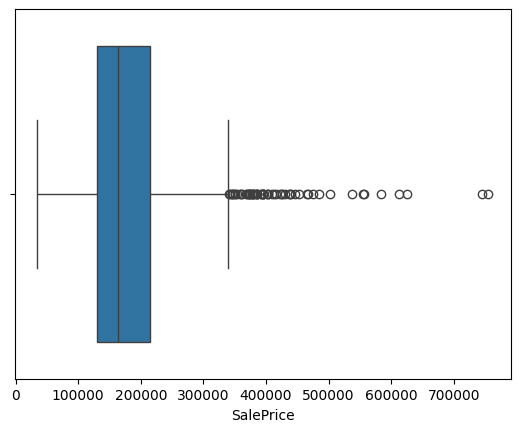

In [9]:
sns.boxplot(data=train, x='SalePrice')

According to previous plots we can see outliers in 'SalePrice' column, we better remove them because they can affect our model.
There are about 14 sample greater than 450000 witch will be removed.

In [10]:
train = train[train['SalePrice'] < 450000].reset_index()
train.shape

(1446, 82)

In [11]:
# cheking for data types
train.dtypes.value_counts()

object     43
int64      36
float64     3
dtype: int64

In [11]:
# X_test.dtypes.value_counts()

In [12]:
train.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1440
MiscFeature     1392
Alley           1355
Fence           1167
FireplaceQu      690
LotFrontage      258
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         7
MasVnrType         7
Electrical         1
HalfBath           0
dtype: int64

In [13]:
# some features has more than 50% missing values, this features will be removed because they don't provide enough information.
train = train.drop(columns=['Id', 'index', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [14]:
# filling missing values with the most frequent value in each column.
train = train.fillna(train.mode().iloc[0])

In [15]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice'].values

In [16]:
X.shape

(1446, 74)

In [17]:
# Specifiying categorical columns
categorical_columns = X.select_dtypes('object')
categorical_columns.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [18]:
# transforming categorical data into numerical data
col_names = categorical_columns.columns
categorical_columns = pd.get_dummies(categorical_columns, columns=col_names)
categorical_columns.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
numerical_columns = X.select_dtypes(['float64', 'int64'])
numerical_columns.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [20]:
numerical_columns.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1446.000000,1446.000000,1446.000000,1446.00000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1446.000000,1446.000000,1446.00000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,56.995159,67.996542,10426.825726,6.06639,5.577455,1971.030429,1984.684647,98.945367,436.552559,46.627248,...,469.369295,93.262794,45.937759,22.166667,3.44260,14.527663,2.401798,43.910097,6.331950,2007.815353
std,42.446131,22.138085,9927.254968,1.34695,1.113250,30.114667,20.654418,171.659401,446.360566,161.520020,...,211.343642,124.484376,65.723213,61.376116,29.45708,54.448467,37.664404,498.502039,2.704688,1.326258
min,20.000000,21.000000,1300.000000,1.00000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7500.000000,5.00000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,326.250000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,63.000000,9434.500000,6.00000,5.000000,1972.000000,1993.000000,0.000000,380.500000,0.000000,...,478.000000,0.000000,24.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11494.500000,7.00000,6.000000,2000.000000,2004.000000,160.000000,703.500000,0.000000,...,576.000000,168.000000,66.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.00000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.00000,480.000000,738.000000,15500.000000,12.000000,2010.000000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

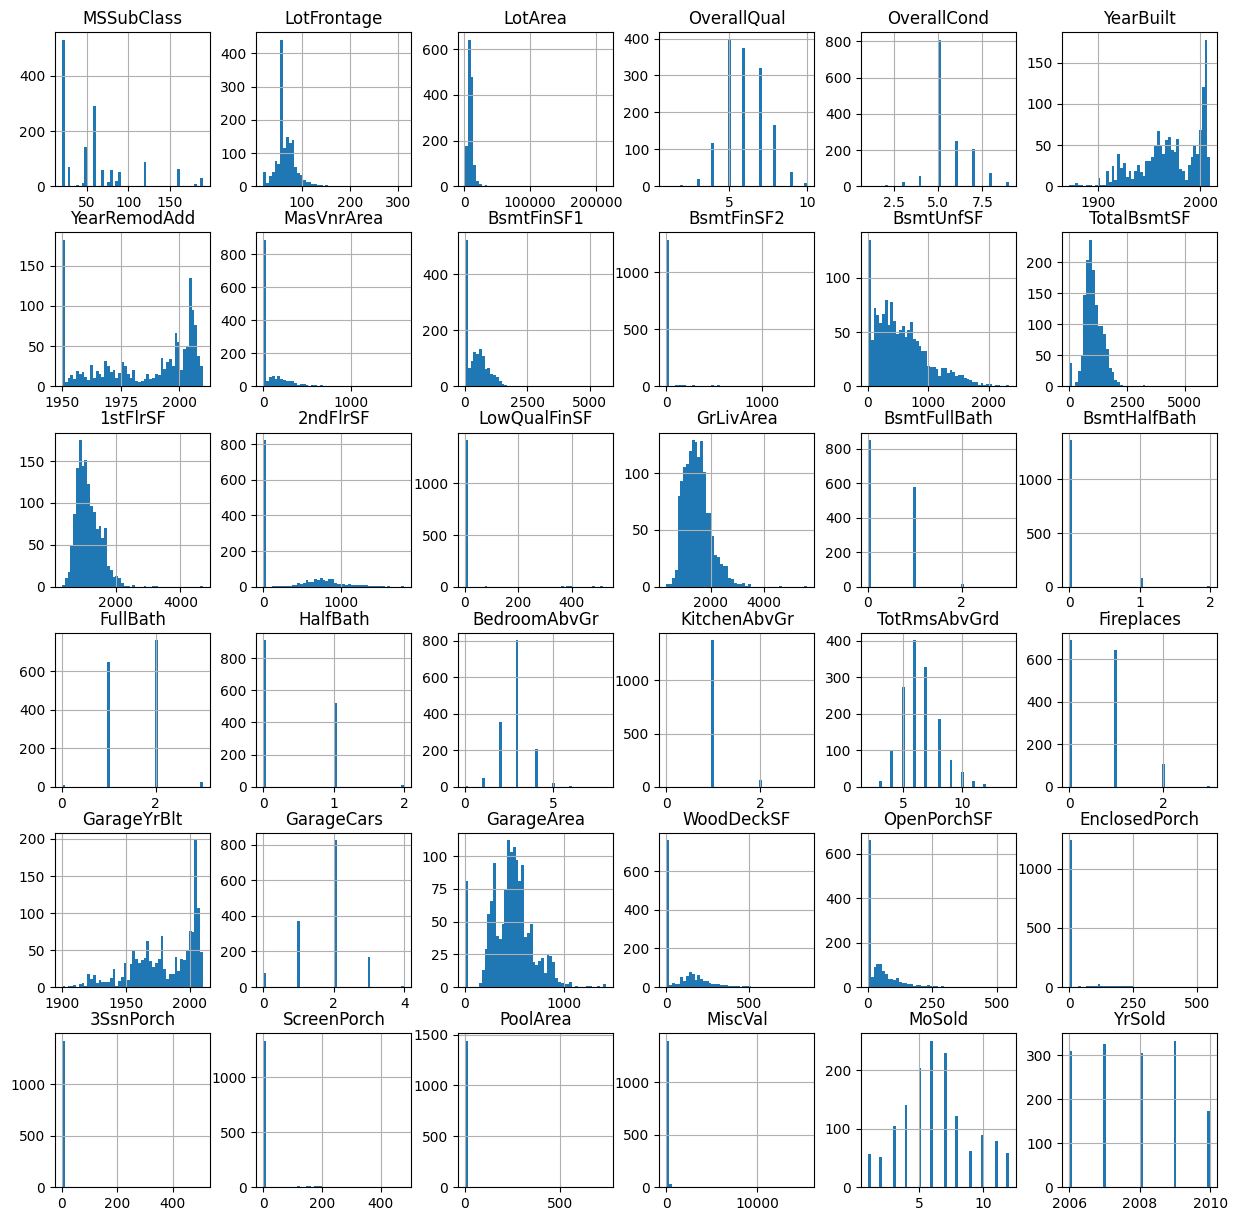

In [21]:
numerical_columns.hist(figsize=(15,15), bins=50)

In [24]:
# Scaling numerical data
col_names = numerical_columns.columns
scaler = MinMaxScaler()
numerical_columns = scaler.fit_transform(numerical_columns)
numerical_columns = pd.DataFrame(numerical_columns, columns=col_names)
numerical_columns.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [25]:
df = pd.concat([categorical_columns, numerical_columns], axis=1)
df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,1,0,0,0,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0,0,0,1,0,0,1,0,0,0,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0,0,0,1,0,0,1,1,0,0,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0,0,0,1,0,0,1,1,0,0,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0,0,0,1,0,0,1,1,0,0,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

## Linear regression models

In [28]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
ridge_model.score(X_train, y_train), ridge_model.score(X_test, y_test)

(0.9243597012098661, 0.8719281207674157)

In [29]:
RMSE_ridge = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_ridge

21935.885755841042

In [30]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
linear_model.score(X_train, y_train), linear_model.score(X_test, y_test)

(0.9362788603477699, -1.1146280918173146e+22)

In [31]:
RMSE_linear = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_linear

6471325974625331.0

In [32]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
lasso_model.score(X_train, y_train), lasso_model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+09, tolerance: 5.933e+08
  model = cd_fast.enet_coordinate_descent(


(0.9374147348107021, 0.8862122463955256)

In [141]:
RMSE_lasso = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_lasso

20676.453373668428

In [142]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
logistic_model.score(X_train, y_train), logistic_model.score(X_test, y_test)

(0.9420415224913494, 0.013793103448275862)

In [143]:
RMSE_lasso = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_lasso

37546.7535295709

## LightGBM

In [145]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
lgbm_model.score(X_train, y_train), lgbm_model.score(X_test, y_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3167
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 172
[LightGBM] [Info] Start training from score 180135.757785


(0.9888564698042797, 0.8737790194088729)

In [146]:
RMSE_lasso = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_lasso

21776.7998458685

In [147]:
feature_importances_lgbm = pd.DataFrame(lgbm_model.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)


In [148]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index
feature_importances_lgbm

,importance,feature
GrLivArea,274,GrLivArea
LotArea,202,LotArea
BsmtFinSF1,187,BsmtFinSF1
1stFlrSF,184,1stFlrSF
GarageArea,171,GarageArea
...,...,...
Exterior2nd_AsbShng,0,Exterior2nd_AsbShng
Exterior2nd_AsphShn,0,Exterior2nd_AsphShn
Exterior2nd_Brk Cmn,0,Exterior2nd_Brk Cmn
Exterior2nd_BrkFace,0,Exterior2nd_BrkFace


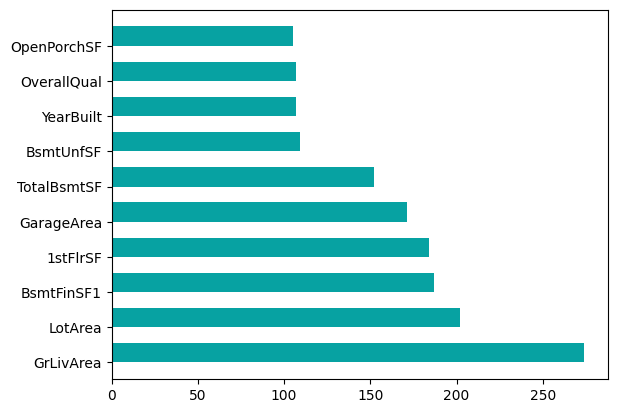

In [149]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10], feature_importances_lgbm.importance[:10], height=0.55, align="edge", color="#07a2a2");
plt.show()

## XGBoost  regression model

In [150]:
parameters = {
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 150, 200, 500, 700],
    'learning_rate': [0.05, 0.1, 0.25, 1]
    }
xgbm = XGBRegressor()
xgbm_cv = RandomizedSearchCV(xgbm, parameters, scoring = 'r2')
xgbm_cv.fit(X_train, y_train)
xgbm_cv.score(X_train, y_train), xgbm_cv.score(X_test, y_test)

(0.9999382755329439, 0.8815673793966854)

In [151]:
xgbm_cv.best_params_

{'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.1}

In [152]:
y_pred = xgbm_cv.predict(X_test)

In [153]:
RMSE_xgboost = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_xgboost

21094.243461131515

In [154]:
# xgbm.feature_importances_
xgbm = XGBRegressor(n_estimators= 700, learning_rate=0.1, max_depth=5)
xgbm.fit(X_train, y_train)
feature_importances_xgbm = pd.DataFrame(xgbm.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_xgbm
feature_importances_xgbm['feature'] = feature_importances_xgbm.index
feature_importances_xgbm

,importance,feature
OverallQual,0.461273,OverallQual
GarageCars,0.068989,GarageCars
BsmtQual_Ex,0.044988,BsmtQual_Ex
GrLivArea,0.030595,GrLivArea
GarageFinish_Unf,0.023923,GarageFinish_Unf
...,...,...
Exterior1st_CBlock,0.000000,Exterior1st_CBlock
SaleCondition_AdjLand,0.000000,SaleCondition_AdjLand
Condition2_Artery,0.000000,Condition2_Artery
SaleCondition_Partial,0.000000,SaleCondition_Partial


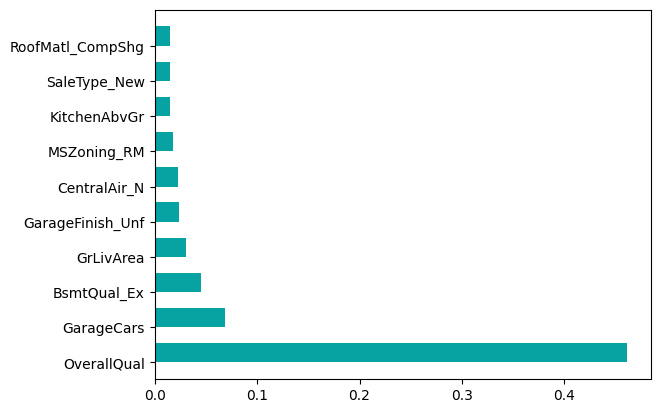

In [155]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10], feature_importances_xgbm.importance[:10], height=0.55, align="edge", color="#07a2a2");
plt.show()

## Randomforest regression model

In [156]:
parameters = {
    'n_estimators': [50,100,200],
    'max_depth': [5, 10, 50],
    'max_features': [15, 50, 100],
    }
rf = RandomForestRegressor()
rf_c = RandomizedSearchCV(rf, parameters, scoring = 'r2')
rf_c.fit(X_train, y_train)
rf_c.best_params_

{'n_estimators': 100, 'max_features': 100, 'max_depth': 50}

In [157]:
y_pred = rf_c.predict(X_test)
rf_c.score(X_test, y_test), rf_c.score(X_train, y_train)

(0.8796554661505819, 0.9819814220688169)

In [158]:
RMSE_rf = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_rf

21263.828901409226

In [ ]:
rf_c = RandomForestRegressor(n_estimators = 100, max_features= 100, max_depth = 50)
rf_c.fit(X_train,y_train)
feature_importances_rf= pd.DataFrame(rf_c.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_rf

In [160]:
feature_importances_rf['feature'] = feature_importances_rf.index
feature_importances_rf

,importance,feature
OverallQual,2.883788e-01,OverallQual
GrLivArea,1.840548e-01,GrLivArea
ExterQual_TA,4.808798e-02,ExterQual_TA
TotalBsmtSF,4.399236e-02,TotalBsmtSF
YearBuilt,4.313091e-02,YearBuilt
...,...,...
Condition2_RRNn,4.511330e-08,Condition2_RRNn
HeatingQC_Po,4.123399e-08,HeatingQC_Po
Exterior2nd_Other,0.000000e+00,Exterior2nd_Other
SaleType_Con,0.000000e+00,SaleType_Con


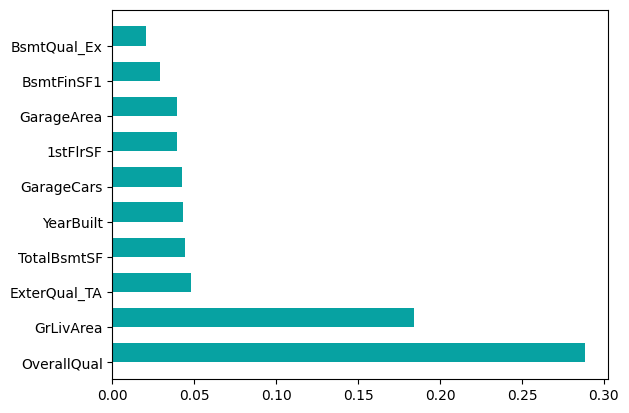

In [161]:
fig, ax = plt.subplots()

ax.barh(feature_importances_rf.feature[:10], feature_importances_rf.importance[:10], height=0.55, align="edge", color="#07a2a2");
plt.show()

## ID3

In [162]:
dt = DecisionTreeRegressor()

regression_df_cv = dt.fit(X_train,y_train)
y_pred = regression_df_cv.predict(X_test)
regression_df_cv.score(X_test, y_test), regression_df_cv.score(X_train, y_train)

(0.7193606871148434, 1.0)

In [163]:
RMSE_dt = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_dt

32471.51403402787

In [164]:
feature_importances_rf= pd.DataFrame(dt.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_rf['feature'] = feature_importances_rf.index
feature_importances_rf

,importance,feature
OverallQual,0.607836,OverallQual
GrLivArea,0.103095,GrLivArea
TotalBsmtSF,0.042432,TotalBsmtSF
BsmtFinSF1,0.035632,BsmtFinSF1
1stFlrSF,0.035219,1stFlrSF
...,...,...
Condition2_PosA,0.000000,Condition2_PosA
Condition2_PosN,0.000000,Condition2_PosN
Condition2_RRAe,0.000000,Condition2_RRAe
Condition2_RRAn,0.000000,Condition2_RRAn


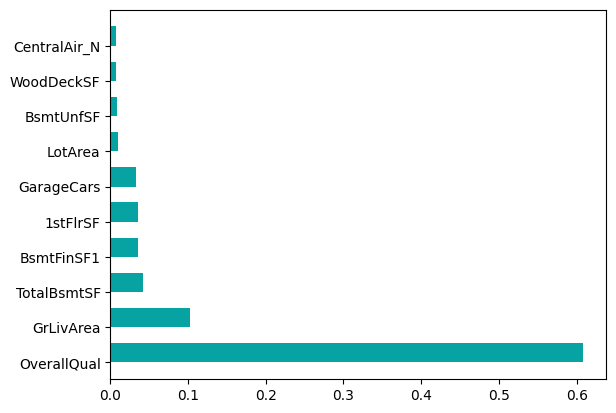

In [165]:
fig, ax = plt.subplots()

ax.barh(feature_importances_rf.feature[:10], feature_importances_rf.importance[:10], height=0.55, align="edge", color="#07a2a2");
plt.show()